# installation matplotlib et seaborn

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# Recap

Nous utilisons des **histogrammes** sur des variables numériques(pour avoir la distribution des données)

Nous utilisons des **boîtes à moustaches** pour comparer la distribution de plusieurs variables numériques(il faut standariser les données)

Nous utilisons des **barplots** sur des variables catégorielles .

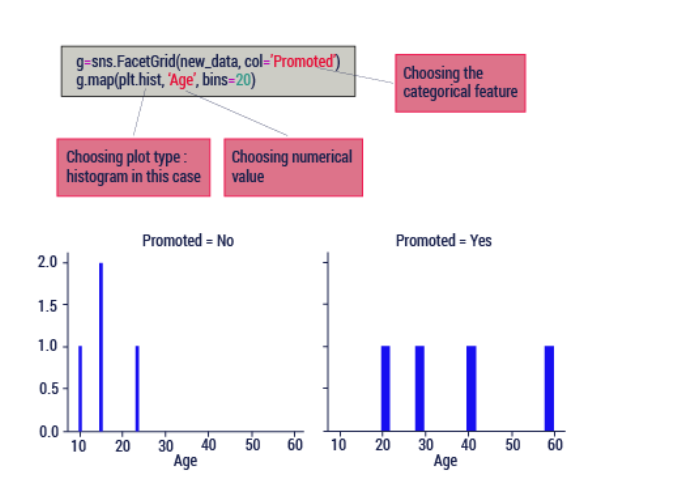

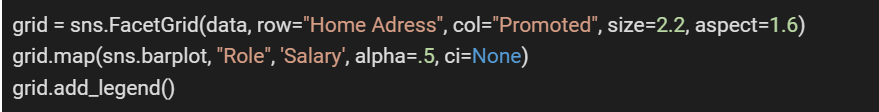

Interprétation de la corrélation
Du graphique précédent, nous pouvons conclure:

Les employés qui vivent en Californie et qui ont été promus ont un salaire de plus de 1500.

Les employés qui vivent en Floride et qui n'ont pas été promus sont moins susceptibles d'avoir un salaire supérieur à 1000.

Plus tard, lors de l'apprentissage automatique, nous pourrons utiliser ces informations lors de la sélection de nos fonctionnalités.

# Correlation groupby

A very useful pandas tool to view the relations between different columns of the dataset is the groupby() function combined with the mean() function:

Since we're checking the correlation between two categorical values, we need to convert “Promoted” from categorical to numeric values or else it won’t work.

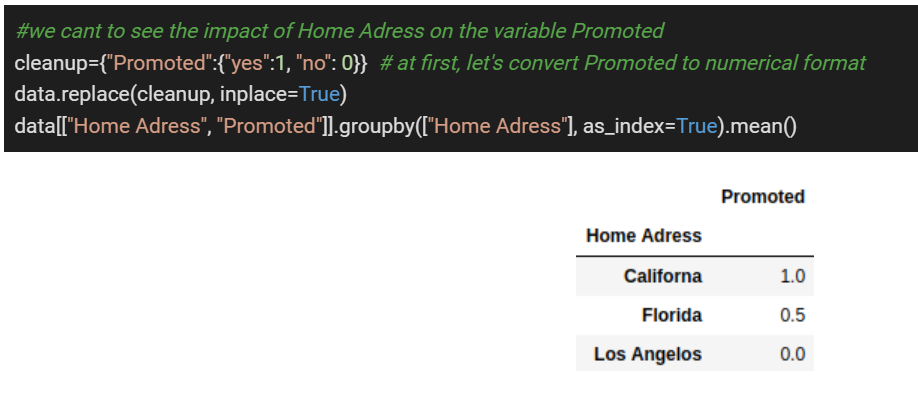

Groupe de corrélation par exemple
Regroupons Rôle et Promu pour voir l'impact du rôle sur la promotion des employés :

On peut conclure:

Tous les managers ont été promus.

Les employés Data Science et Web 01 n'ont pas été promus .

La moitié des employés de l'IA ont été promus.

50 % des salariés de l'IA ont été promus.

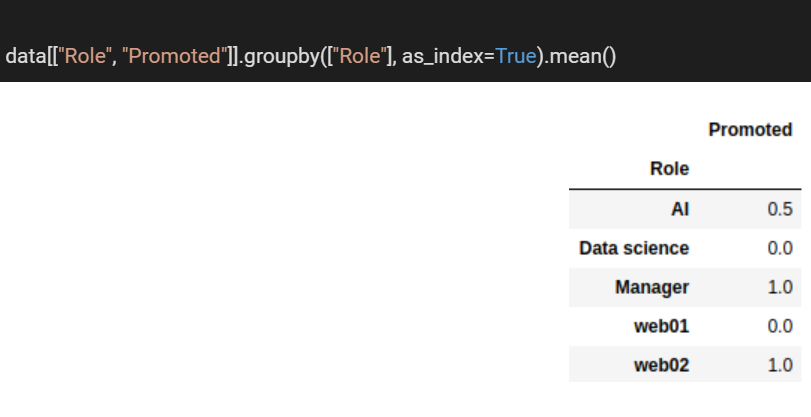

# Recap Corr

Pour visualiser la corrélation entre deux variables numériques, nous pouvons utiliser des nuages ​​de points .

Nous pouvons avoir une corrélation positive, une corrélation négative ou aucune corrélation

# Application DATAViZ avec le dataset Titanic

In [97]:
import pandas as pd
data=pd.read_csv("C:/Users/Amani/Desktop/python/titanic-passengers.csv")

In [7]:
data.head()

,PassengerId;Survived;Pclass;Name;Sex;Age;SibSp;Parch;Ticket;Fare;Cabin;Embarked
343;No;2;Collander,Mr. Erik Gustaf;male;28.0;0;0;248740;13.0;;S
76;No;3;Moen,Mr. Sigurd Hansen;male;25.0;0;0;348123;7.65;F...
641;No;3;Jensen,Mr. Hans Peder;male;20.0;0;0;350050;7.8542000...
568;No;3;Palsson,Mrs. Nils (Alma Cornelia Berglund);female;29....
672;No;1;Davidson,Mr. Thornton;male;31.0;1;0;F.C. 12750;52.0;B71;S


In [169]:
data=pd.read_csv("C:/Users/Amani/Desktop/python/titanic-passengers.csv",sep=";")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [10]:
data.shape

(891, 12)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [11]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
df_nan = pd.DataFrame({'Nan':data.isna().sum()})
df_nan['%nan'] = df_nan['Nan']/data.shape[0]*100
round(df_nan,2).sort_values(by='%nan' , ascending=False)

,Nan,%nan
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [170]:
Age = data['Age'] # on remplace les valeurs manquantes par la median
Age[Age.isna() == True] = Age.median()
data['Age'] = Age

C:\Users\Amani\AppData\Local\Temp/ipykernel_19088/2525124214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age[Age.isna() == True] = Age.median()


In [15]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [171]:
data.groupby(['Pclass']).mean()

,PassengerId,Age,SibSp,Parch,Fare
Pclass,,,,,
1,461.597222,36.812130,0.416667,0.356481,84.154687
2,445.956522,29.765380,0.402174,0.380435,20.662183
3,439.154786,25.932627,0.615071,0.393075,13.675550


In [172]:
#target
data['Survived'].value_counts()

No     549
Yes    342
Name: Survived, dtype: int64

In [173]:
#cleanup pour remplace le yes par 1 et no par 0
cleanup={"Survived":{"Yes":1,"No":0}}
data.replace(cleanup,inplace=True)


In [174]:
data[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [108]:
data[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


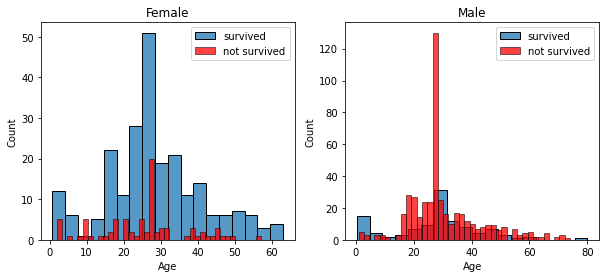

In [175]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data[data['Sex']=='female']
men = data[data['Sex']=='male']
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False,color='r')
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False,color='r')
ax.legend()
_ = ax.set_title('Male')

In [176]:
data.groupby(['Sex'])['Age'].mean()

Sex
female    27.929936
male      30.140676
Name: Age, dtype: float64

In [177]:
data.groupby(['Sex'])['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [178]:
data.Name.head()

0                     Collander, Mr. Erik Gustaf
1                        Moen, Mr. Sigurd Hansen
2                         Jensen, Mr. Hans Peder
3    Palsson, Mrs. Nils (Alma Cornelia Berglund)
4                         Davidson, Mr. Thornton
Name: Name, dtype: object

In [179]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 }

        )

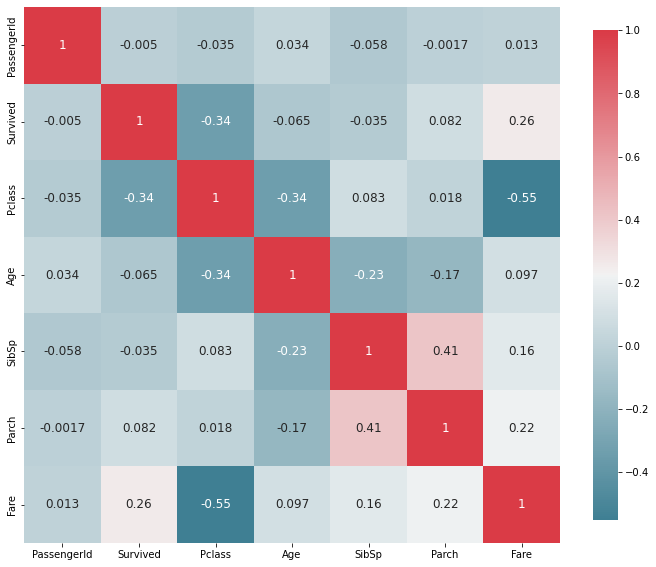

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_correlation_map( data )

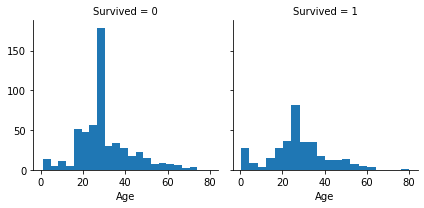

In [181]:
g=sns.FacetGrid(data,col='Survived')
g.map(plt.hist,'Age',bins=20)

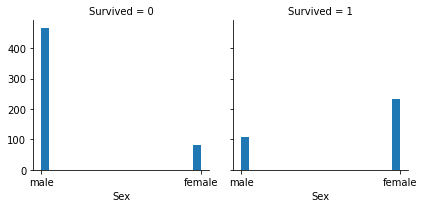

In [182]:
g=sns.FacetGrid(data,col='Survived')
g.map(plt.hist,'Sex',bins=20)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

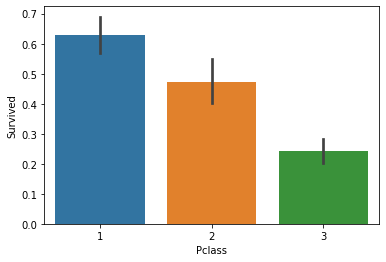

In [198]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=data)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

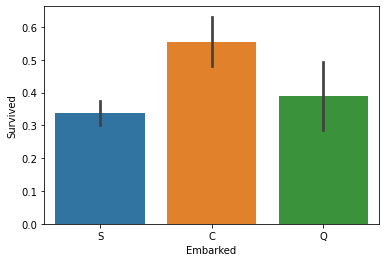

In [215]:
sns.barplot(x='Embarked', y="Survived", data=data)

In [ ]:
#extract title

In [184]:
data['Titre'] = data.Name.map(lambda x : x.split(",")[1].split(".")[0])
#data['NomFamille'] = data.Name.map(lambda x : x.split(",")[0])
data['Titre'].value_counts() # affiche tous les titres possible

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 Don               1
 Lady              1
 Jonkheer          1
 Mme               1
 Sir               1
 Capt              1
 the Countess      1
 Ms                1
Name: Titre, dtype: int64

In [185]:
data[["Titre","Sex"]].groupby(["Sex"], as_index=False).mean()

C:\Users\Amani\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Sex
0,female
1,male


In [209]:
Title_Dictionary = {'Capt':'Officer',
                    'Col':'Officer',
                   'Major':'Officer',
                    'Dr':'Officer',
                    'Rev':'Officer',
                    'Jonkheer':'Royalty',
                    'Don':'Royalty',
                     'Sir' : 'Royalty',
                    'Lady' : 'Royalty',
                    'the Countess': 'Royalty',
                     'Dona': 'Royalty',
                    'Mme': 'Miss',
                     'Mlle':'Miss',
                     'Miss' : 'Miss',
                    'Ms':   'Mrs',
                    'Mr' :  'Mrs',
                    'Mrs' : 'Mrs',
                    'Master' : 'Master'}

In [210]:
data = data.replace({"Titre":Title_Dictionary}) 

In [211]:
data.Titre.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 Don               1
 Lady              1
 Jonkheer          1
 Mme               1
 Sir               1
 Capt              1
 the Countess      1
 Ms                1
Name: Titre, dtype: int64

In [212]:
#2 eme methode
data['Titre'] = data['Titre'].replace(['Capt', 'Col','Dr', 'Major', 'Rev'], "Officer")
data['Titre'] = data['Titre'].replace(['Countess', 'Lady', 'Sir',"Jonkheer","Don","Dona"], "Royalty")
data['Titre'] = data['Titre'].replace('Mlle', 'Miss')
data['Titre'] = data['Titre'].replace('Ms',  "Mrs")
data['Titre'] = data['Titre'].replace('Mr',  "Mrs")
data['Titre'] = data['Titre'].replace('Mme', "Miss")

data[['Titre', 'Survived']].groupby(['Titre'], as_index=False).mean()

,Titre,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


# conclusion